# Predict Student's Dropout and Academic Success Using ML Models

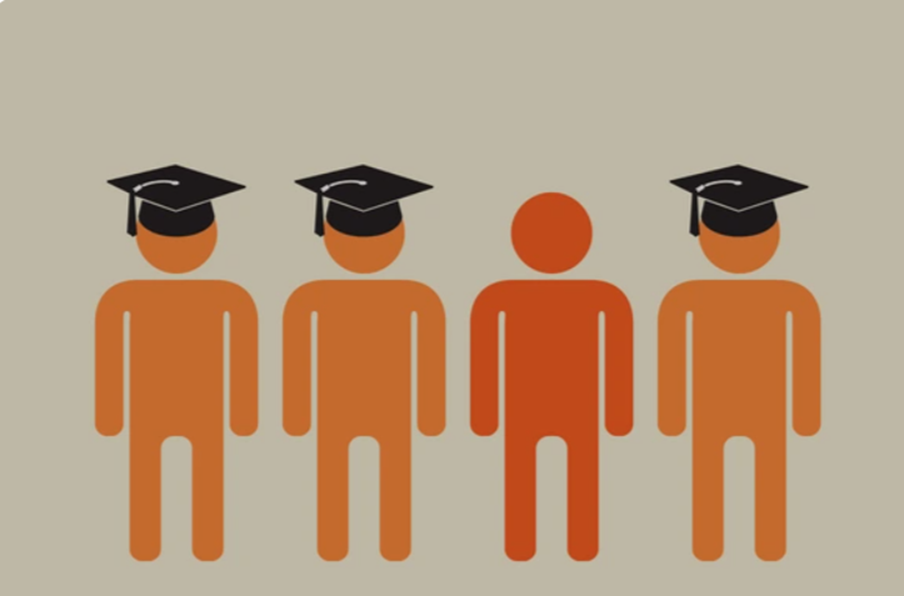

In [72]:
from IPython.display import Image, display

# Display an image using Python with raw string
display(Image(filename=r"C:\\Users\\Akshay Patil\\Downloads\\1_sCh7gLTntXN_57FbUv9w3A.png"))

# Importing Libraries

In [4]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Exploring Data

In [5]:
students = pd.read_csv("C:\\Users\\Akshay Patil\\Downloads\\All Dataset\\Academic-success-dataset.csv")
students

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [6]:
students.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


# Understanding Data

In [7]:
students.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

# Data Description:

* Marital status: The marital status of the student. (Categorical)
* Application mode: The method of application used by the student. (Categorical)
* Application order: The order in which the student applied. (Numerical)
* Course: The course taken by the student. (Categorical)
* Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
* Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
* Nationality: The nationality of the student. (Categorical)
* Mother's qualification: The qualification of the student's mother. (Categorical)
* Father's qualification: The qualification of the student's father. (Categorical)
* Mother's occupation: The occupation of the student's mother. (Categorical)
* Father's occupation: The occupation of the student's father. (Categorical)
* Displaced: Whether the student is a displaced person. (Categorical)
* Educational special needs: Whether the student has any special educational needs. (Categorical)
* Debtor: Whether the student is a debtor. (Categorical)
* Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
* Gender: The gender of the student. (Categorical)
* Scholarship holder: Whether the student is a scholarship holder. (Categorical)
* Age at enrollment: The age of the student at the time of enrollment. (Numerical)
* International: Whether the student is an international student. (Categorical)
* Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
* Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
* Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
* Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

### *Total columns: 35 
### *Total rows: 4424  
###  *Dtypes: float64(5), int64(29), object(1)

In [9]:
students.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [10]:
students.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

### The dataset contains 0 missing values

In [11]:
students = students.rename(columns={'Nacionality': 'Nationality'})
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nationality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [12]:
print('The number of duplicated Record in the student\'s dataset is', students.duplicated().sum())

The number of duplicated Record in the student's dataset is 0


# Exploratory Data Analysis (EDA)

#### Let's see what we can learn from this data

#### There are different types of variables: numerical and categorical (nominal and ordinal)

#### Let's begin with the categorical variable

In [13]:
students['Target'].value_counts()

Graduate    36282
Dropout     25296
Enrolled    14940
Name: Target, dtype: int64

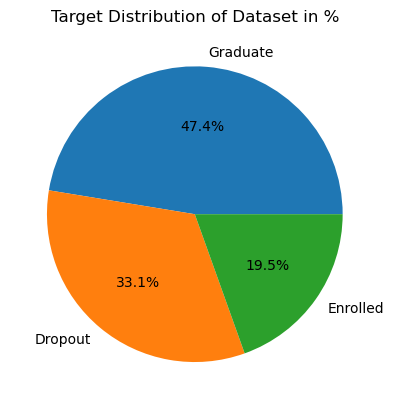

In [14]:
#store the value counts in a variable
students_target = students['Target'].value_counts()

#visualize the target variable
plt.pie(students_target, labels=students_target.index, autopct='%2.1f%%')
plt.title('Target Distribution of Dataset in %')
plt.show()

### Approximately 50% of students in the data have graduated.

**Demographics**

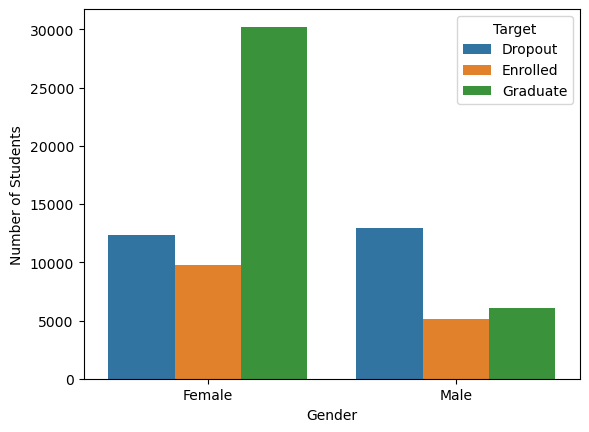

In [15]:
#gender affecting academic status of students
sns.countplot(data=students, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Number of Students')
plt.show()

### According to the data, females have the highest number of graduants but also have the highest number of dropouts compared to males.

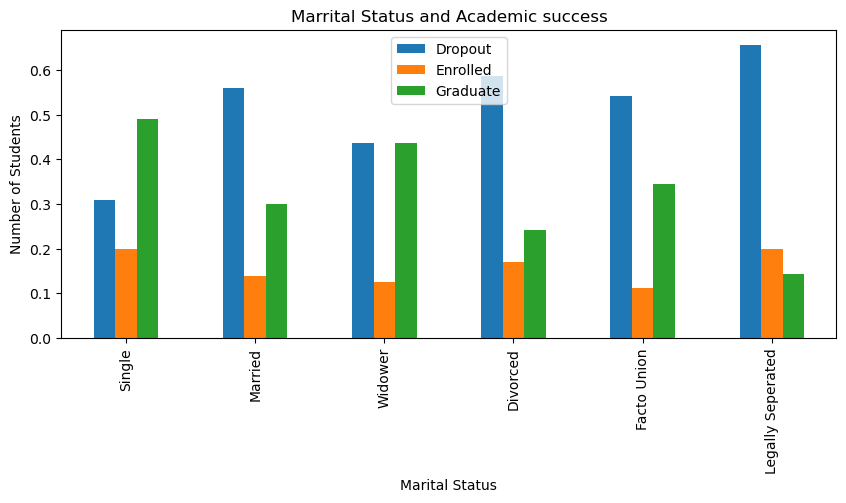

In [16]:
# Marital Status affecting the academic success of students
pd.crosstab(students["Marital status"], students["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success" )
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])

plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.legend(loc=9)
plt.show()

### **The following deductions can be made from the above bar graph:** 

#### * Students who are legally seperated stand a high chance of dropping out.
#### * Single students have more chance of graduating as their focus
#### * Marriend and divorced individuals have more chances of dropping out but the gap between dropping out and graduating is small.



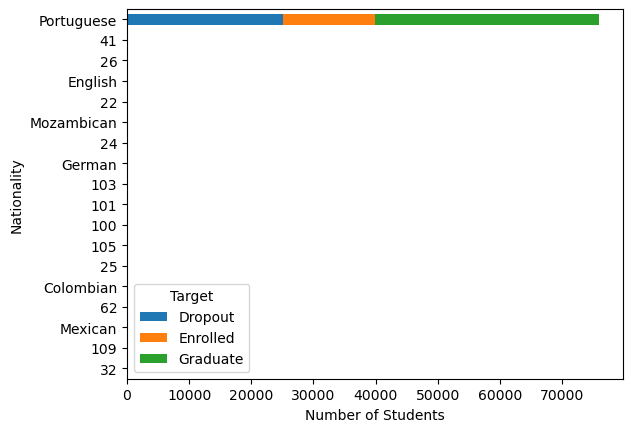

In [17]:
student_nationality = students.groupby(['Nationality', 'Target']).size().reset_index().pivot(columns='Target', index='Nationality', values=0)

# Rename the index of the DataFrame
student_nationality = student_nationality.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

student_nationality_total = student_nationality.sum(axis=1)
student_nationality_sorted = student_nationality_total.sort_values(ascending=True)
student_nationality.loc[student_nationality_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()


### The data comprises of students of portugese descent only, which accounts for the highest frequency among all the nationalities. This means that the nationality feature is not a good predictor or an explanatory variable for the outcome of student dropout. So it can be removed.

In [18]:
# Create a variable for all the features to be removed
features_tobe_removed = ['Nationality']

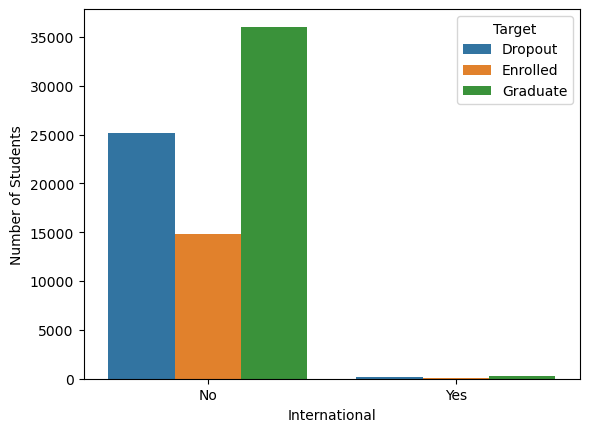

In [19]:
sns.countplot(data=students, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

### The data is dominated by students of the portugese nationality and thus can explain the above bar plot. The internation feature is also not a good predictor and thus can be removed.

In [20]:
features_tobe_removed.extend(['International'])
features_tobe_removed

['Nationality', 'International']

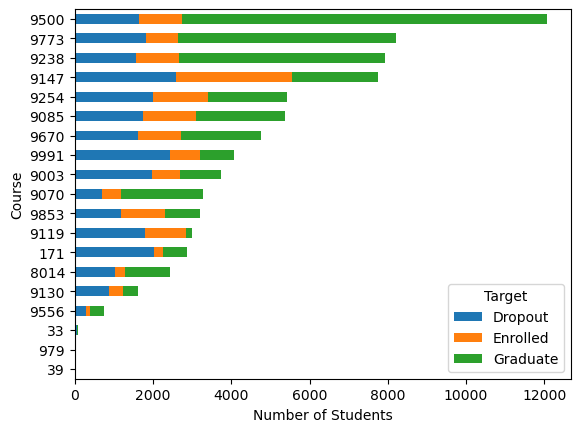

In [21]:
# Student's course affecting the academic success of students
student_course = students.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Let's rename the index of the DataFrame
student_course = student_course.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

### Nursing course produced the highest number of graduates while management course produced the highest number of dropouts.

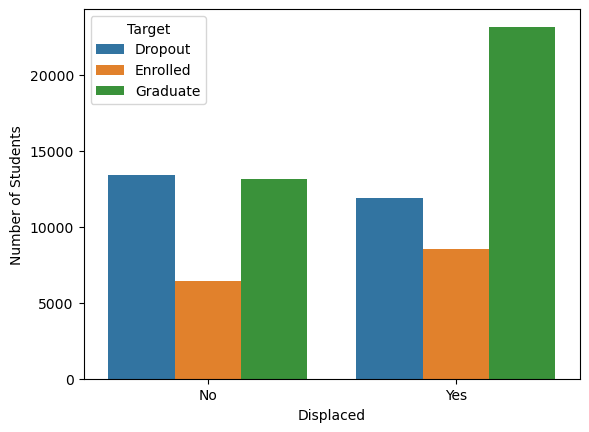

In [22]:
# Displaced students and the academic success of students
sns.countplot(data=students, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

### Students who already graduated are mostly displaced students.



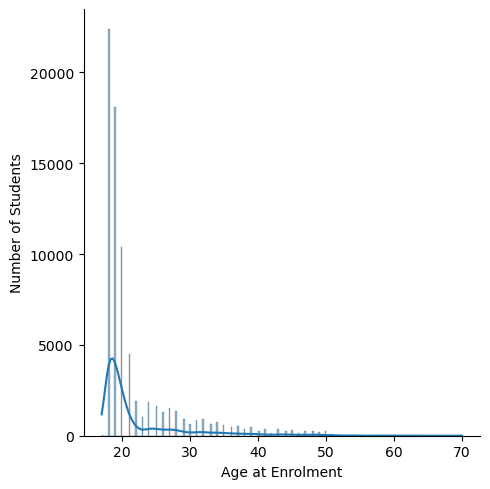

In [23]:
# Age and the academic success of students
sns.displot(data=students, x='Age at enrollment', kde=True)
students['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

### The above distplot is positively skewed. This shows that students enroll between the ages 17 and 70 with the mean age (majority) at age 23 years old. 

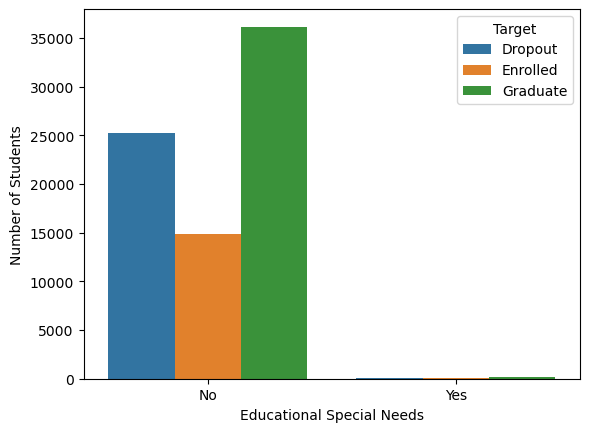

In [24]:
sns.countplot(data=students, x='Educational special needs', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of Students')
plt.show()

### Students who graduated and dropped do not have special needs. 

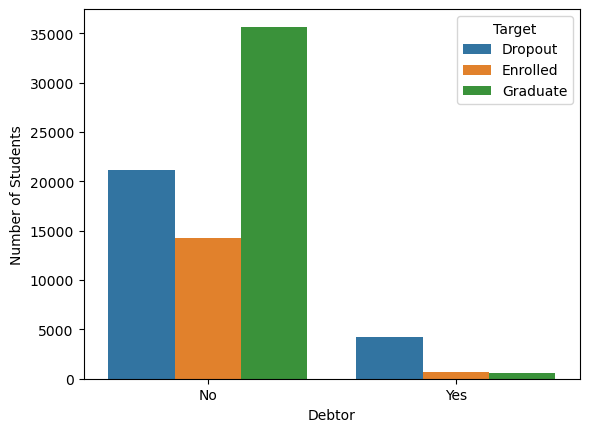

In [25]:
sns.countplot(data=students, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()

### Students with no debts enrolled and graduated while few students  in debt enrolled and dropped out.

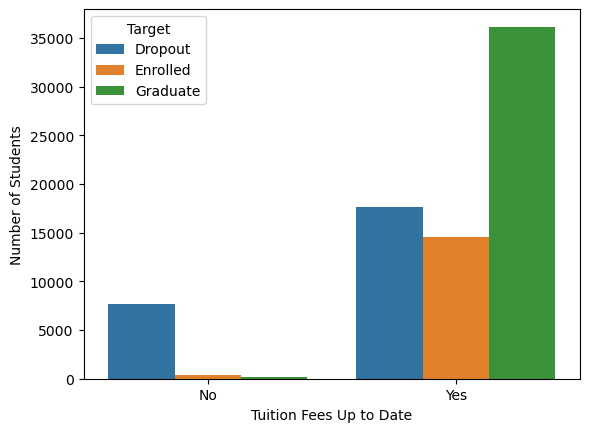

In [26]:
sns.countplot(data=students, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

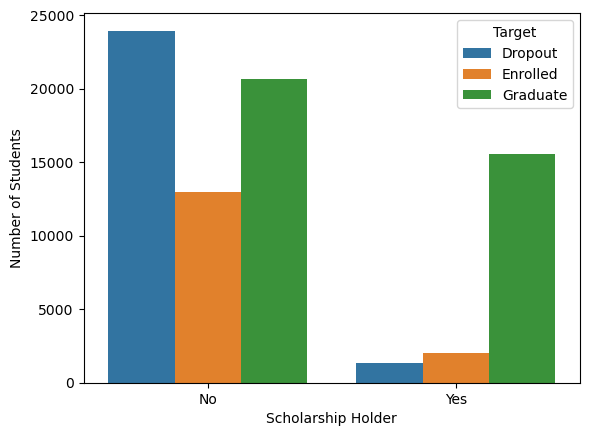

In [27]:
# Scholarship holders and the academic success of students
sns.countplot(data=students, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

### From the above graph, we can deduce that students with scholaships have higher chances of graduating than dropping out.

# Feature Selection

### There are a lot of features, let's group them then find their correlation with the target variable

In [28]:
# Demographic data

demo_data = students[["Marital status", "Nationality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# Socio-economic data
se_data = students[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# Macro-economic Enrollment Data
me_data = students[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# Academic data
academic_data = students[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]



C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_12044\3856920338.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(demo_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')


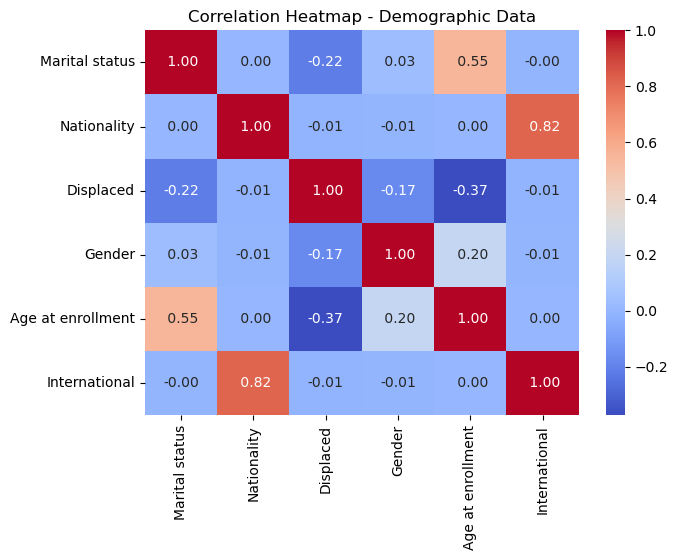

In [29]:
# Correlation Matric for Demographic data

plt.figure(figsize=(7,5))
sns.heatmap(demo_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Heatmap - Demographic Data')
plt.show()

### * International and Nationality has 0.91 correlation while all other features seem to be normally related to the Target varible.

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_12044\3305102859.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(se_data.corr(), annot=True, fmt=' .2f')


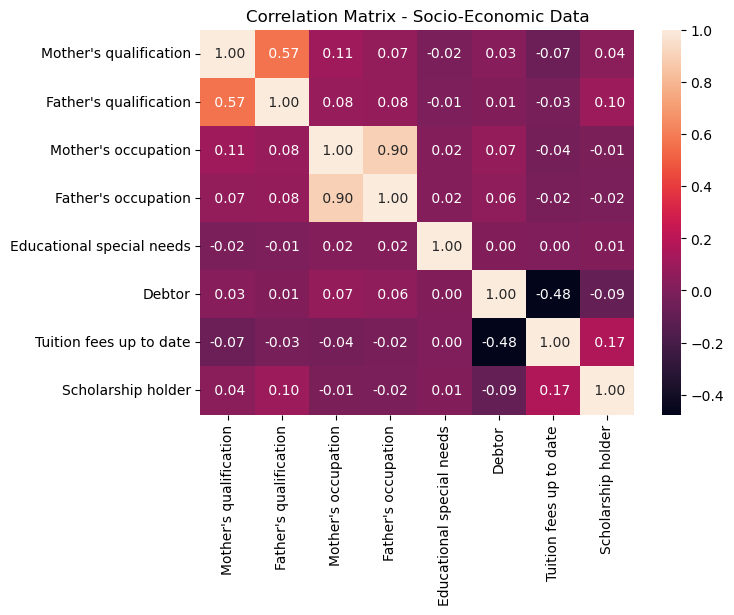

In [30]:
# Correlation Matrix for socio-economic data
plt.figure(figsize=(7,5))
sns.heatmap(se_data.corr(), annot=True, fmt=' .2f')
plt.title('Correlation Matrix - Socio-Economic Data')
plt.show()

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_12044\2896886052.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(me_data.corr(), annot=True, cmap='YlGnBu', fmt=' .2f')


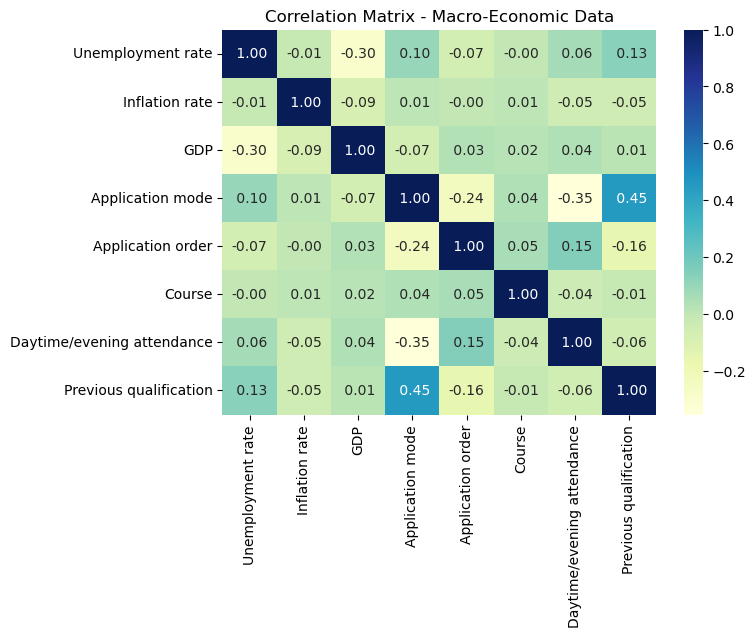

In [31]:
# Correlation Matrix for Macro-Economic Data
plt.figure(figsize=(7,5))
sns.heatmap(me_data.corr(), annot=True, cmap='YlGnBu', fmt=' .2f')
plt.title('Correlation Matrix - Macro-Economic Data')
plt.show()

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_12044\2447112743.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(academic_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')


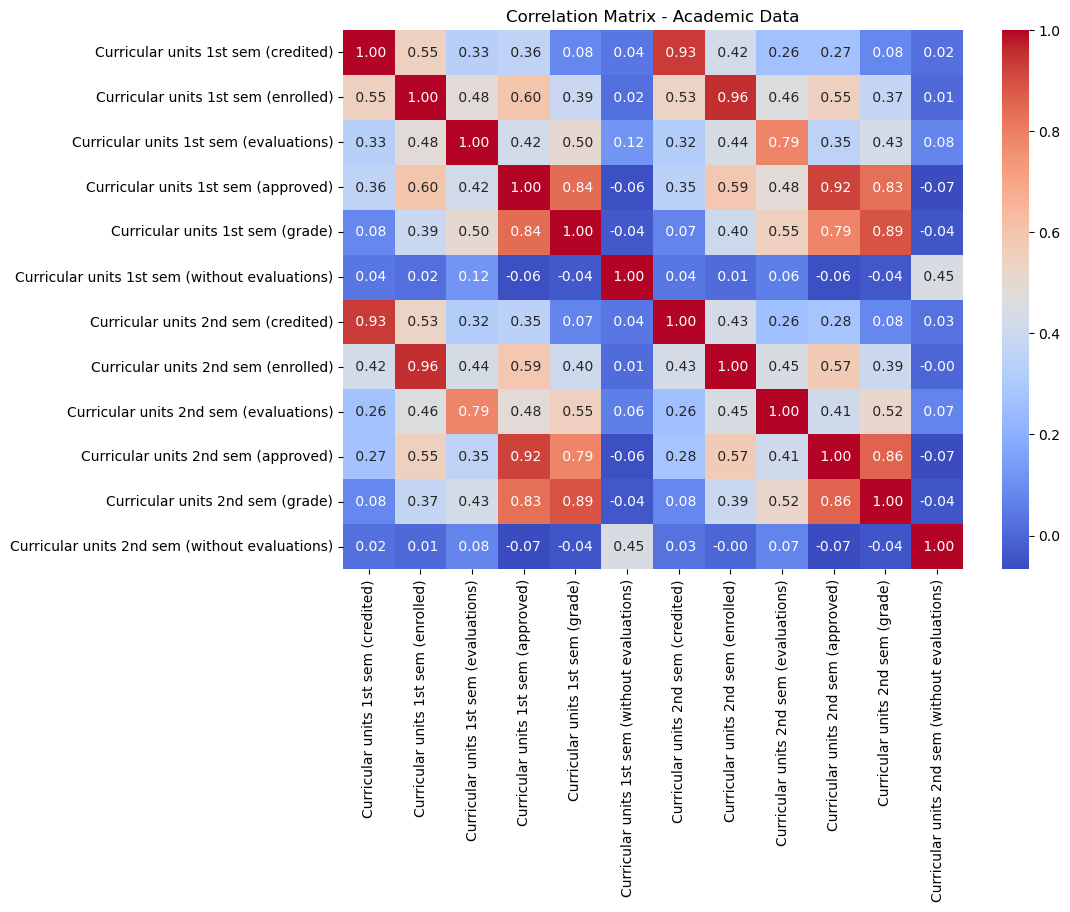

In [32]:
# Correlation Matrix for Academic Data
plt.figure(figsize=(10,7))
sns.heatmap(academic_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Matrix - Academic Data')
plt.show()

### To reduce redundancy and a case of potential overfitting in the dataset, let's group and remove feautures with similar correlations.

## **Features with similar correlations that can be removed**
### * Curricular units 1st sem (credited) correlates with sem 2 = 0.94
### * Curricular units 1st sem (enrolled) correlates with sem 2 = 0.94
### * Curricular units 1st sem (evaluation) correlates with sem 2 = 0.78
### * Curricular units 1st sem (approved) correlates with sem 2 = 0.90
### * Curricular units 1st sem (grade) correlates with sem 2 = 0.84

### Moreover sem 2 data seems to correlate more with the Target variable so let's remove Sem 1 data.

In [33]:
# Add the sem 1 data to the list of features to be removed
features_tobe_removed.extend(["Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)"])
features_tobe_removed

['Nationality',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)']

In [34]:
# Perfom deminsionality reducation via drop
students.drop(features_tobe_removed, axis=1, inplace=True)
students.head(3)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout


In [35]:
students['Target'].value_counts()

Graduate    36282
Dropout     25296
Enrolled    14940
Name: Target, dtype: int64

### Since we are predicting Student's dropout and academic success 'Enrolled' category is of no use.

In [36]:
# Remove all rows in the datafram where the value in the Target column equals Enrolled
students = students[students.Target != 'Enrolled']

# Modelling

## Label Encoding of Target Variable

In [37]:
# Converting Target Variable into Numeric Form

encoder = LabelEncoder()
students['Target'] = encoder.fit_transform(students['Target'])
students.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,1
1,1,1,17,1,9238,1,1,125.0,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,2,1,17,2,9254,1,1,137.0,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
4,4,1,1,2,9500,1,1,132.0,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,1
5,5,1,39,1,171,1,19,133.1,19,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,0


## Splitting Features and Target Variables into X and Y

In [38]:
X = students.drop('Target', axis=1)
y = students['Target']

# Feature Scaling


In [39]:
# Let's use the MinMaxScaler on the X data
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

## Train-Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Building a base model:
## * Logistic Regression
## * K-Nearest Neighbors
## * Decision Tree Classifier


In [41]:
# Create a function to build our models
def models(X_train, y_train):

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # Decision Trees
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)


    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    return lr, dt, knn

lr, dt, knn = models(X_train, y_train)

# prediction
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)


C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Evaluation

In [68]:
# # Create a function to evaluate the models
# def evaluate_models(X_test, y_test, models):
#     results = [] # A list to store the evaluation results of each model
#     for name, model in models.items():

#         # make prediction on the test data
#         y_pred = model.predict(X_test)

#         # calculate the evaluation metric scores
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred)

#         # store the results in a list of dictionary
#         results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
    
#     # Convert the lit of dictionaries to a pandas DataFrame
#     return pd.DataFrame(results)

# # define a dict containing the trained models for each algorithm
# models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rfc, 'KNN': knn}

# # call the evaluate models function on the test data and models dictionary
# results_df = evaluate_models(X_test, y_test, models)

# print(results_df)

In [46]:
# Define and train the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

# Fit the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Create a function to evaluate the models
def evaluate_models(X_test, y_test, models):
    results = []  # A list to store the evaluation results of each model
    for name, model in models.items():
        # Make prediction on the test data
        y_pred = model.predict(X_test)

        # Calculate the evaluation metric scores
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Store the results in a list of dictionaries
        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    # Convert the list of dictionaries to a pandas DataFrame
    return pd.DataFrame(results)

# Define a dict containing the trained models for each algorithm
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rfc, 'KNN': knn}

# Call the evaluate models function on the test data and models dictionary
results_df = evaluate_models(X_test, y_test, models)

print(results_df)

C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.940322   0.933307  0.967308
1        Decision Tree  0.901673   0.922266  0.908852
2        Random Forest  0.942514   0.935285  0.968971
3                  KNN  0.902566   0.885685  0.957335


# 1).Model Performance:

Logistic Regression: Accuracy 94.03%, Precision 93.33%, Recall 96.73%

Decision Tree: Accuracy 90.17%, Precision 92.23%, Recall 90.88%

Random Forest: Accuracy 94.25%, Precision 93.53%, Recall 96.90%

KNN: Accuracy 90.26%, Precision 88.57%, Recall 95.73%

# 2).Best Model:
Random Forest: Best overall with highest accuracy and recall, and high precision.

# 3).Precision Focus:
Logistic Regression and Random Forest minimize false positives.

# 4).Recall Focus:
Random Forest and Logistic Regression are effective at identifying true dropouts.

# Insights:
Random Forest is recommended for its balanced high performance.

Logistic Regression is also a strong choice for its simplicity and interpretability.

Decision Tree and KNN perform well but have lower precision, leading to more false positives.

These models can help educational institutions better identify and support at-risk students.

# Hyper Parameter Tuning

### Let's try improve the models and see which one will be more useful to our problem

In [48]:
folds = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [49]:
def grid_search(model, folds, params, scoring):
    grid_search = GridSearchCV(model,
                                cv=folds,
                                param_grid=params,
                                scoring=scoring,
                                n_jobs=1,
                                verbose=1)
    return grid_search

In [50]:
def print_best_score_params(model):
    print('Best Score: ', model.best_score_)
    print('Best Hyperparameters: ', model.best_params_)

In [51]:

log_reg = LogisticRegression()
log_params = {
    'C': [0.01, 1, 10],
    'penalty': ['11', '12', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'saga']

}
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

In [52]:
grid_search_log.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and 

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.01, 1, 10],
                         'penalty': ['11', '12', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'saga']},
             verbose=1)

In [53]:
print_best_score_params(grid_search_log)

Best Score:  0.9401567130851367
Best Hyperparameters:  {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}


### The hyperparameter tuning for Logistic Regression achieved a significant improvement, with the best model configuration achieving a high accuracy score of 94.02%.

In [54]:
lr = LogisticRegression(C = 0.01, penalty='none', solver='saga')
lr.fit(X_train, y_train)

C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.01, penalty='none', solver='saga')

In [55]:
y_pred = lr.predict(X_test)

In [56]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9403215329652485


In [57]:
dtc = DecisionTreeClassifier(random_state=42)
dtc_params = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 30],
}
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

In [58]:
grid_search_dtc.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 30]},
             scoring='roc_auc_ovr', verbose=1)

In [59]:
print_best_score_params(grid_search_dtc)

Best Score:  0.9687555166817361
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 30}


In [60]:
dtc = DecisionTreeClassifier(max_depth= 10, min_samples_leaf=20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)

In [61]:
dtc_y_pred = dtc.predict(X_test)

In [62]:
print('Accuracy: ', accuracy_score(y_test, dtc_y_pred))

Accuracy:  0.9399155569990256


In [63]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
grid_search_params = {
    'n_neighbors' : [1,2,3,4,8,9,14,19,20,25],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute']
    }
grid_search_knn = GridSearchCV(knn, grid_search_params, cv = 10, scoring="accuracy")
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(n_neighbors=8, weights='distance'),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 8, 9, 14, 19, 20, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [64]:
print("Best parameters:",grid_search_knn.best_estimator_)
print("Best score :",grid_search_knn.best_score_)

Best parameters: KNeighborsClassifier(n_neighbors=8, weights='distance')
Best score : 0.9043888354218442


# Prediction System

In [67]:
# # Logistic Regression is the best performing one after hyper parameter tuning

# input_data = (1, 1, 2, 14, 1, 1, 1, 3, 5, 4, 0, 0, 0, 1, 0, 0, 19, 0, 5, 6, 6, 13, 13.2, 0, 9.4, -0.8, -3.12) 
# input_data_as_numpy_array = np.asarray(input_data)
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = lr.predict(input_data_reshaped)

# print(prediction)
# print("The initial value is ",prediction[0])

In [66]:

# Replace this with the actual number of features in your training data
n_features = 30

# Example input data with the correct number of features
input_data = (1, 1, 2, 14, 1, 1, 1, 3, 5, 4, 0, 0, 0, 1, 0, 0, 19, 0, 5, 6, 6, 13, 13.2, 0, 9.4, -0.8, -3.12, 0, 0, 0) 

if len(input_data) == n_features:
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Apply the same scaling as used during training, if applicable
    input_data_scaled = scaler.transform(input_data_reshaped)

    prediction = lr.predict(input_data_scaled)

    print(prediction)
    print("The initial value is", prediction[0])
else:
    print(f"Error: Expected {n_features} features, but got {len(input_data)} features.")

[1]
The initial value is 1


C:\Users\Akshay Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Observation:
The prediction system successfully processes input data with the correct number of features (30 in this case) and applies necessary transformations (such as scaling) before making a prediction.

# Insight:
1).Feature Consistency: The system validates the input data to ensure it matches the expected number of features (n_features = 30), preventing errors during prediction.

2).Prediction Accuracy: After preprocessing the input data, the Logistic Regression (lr) model predicts the output class with the initial prediction value being 1, indicating a positive outcome based on the input features.

### This system ensures robustness by enforcing feature consistency and leveraging preprocessing steps used during training, thereby maintaining accurate predictions in deployment scenarios.

# Business Impact:
Implementing a robust prediction system, like the one described, can significantly impact a small business in several ways:

# 1).Enhanced Decision Making: 
By accurately predicting outcomes (such as student dropout or academic success), educational institutions can make informed decisions regarding resource allocation, student support services, and curriculum planning.

# 2).Resource Optimization: 
Identifying at-risk students early allows institutions to allocate resources more effectively, targeting interventions where they are most needed. This can lead to improved retention rates and overall student satisfaction.

# 3).Operational Efficiency: 
Automation of prediction processes reduces manual effort and improves operational efficiency. This frees up staff to focus on more strategic tasks and enhances productivity.

# 4).Competitive Advantage: 
Institutions that effectively use predictive analytics can differentiate themselves by offering personalized support to students, fostering a positive reputation and attracting more enrollments.

# 5).Financial Savings:
By reducing dropout rates and improving academic success, institutions can potentially save on costs associated with student recruitment and retention efforts.

Implementing predictive analytics not only improves educational outcomes but also enhances operational efficiency and strategic decision-making capabilities, ultimately leading to a more competitive and sustainable educational institution.